<h1> Monte Carlo Simulations </h1>

In [1]:
import numpy as np
import scipy.special as sp
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

<h2> Pi Calculator </h2>

We calculate the value of $\pi$ using to our advantage the fact that the probability for a random sample from a grid containing a circle to be part of the circle is <br>
$P_C = \frac{A_r}{A_T} = \frac{\pi r^2}{4 r^2} = \frac{\pi}{4}$ <br>
Since we can also determine through the Monte Carlo simulation that $P_C = \frac{N_C}{N_T}$, the value of $\pi$ is given by the ratio of samples <br>
$\pi = 4 \frac{N_C}{N_T}$ <br>
with $N_C$ being the number of samples that fall inside the circle and $N$ the total number of samples. The more random samples are used, and the greater the grid resolution, the better one can compute the value of $\pi$. It is necessary to note however, that the quality of the random data will affect the result and conventional random number generators (RNG) may influence precision at large sample counts $N_T$.

In [2]:
#define function to create a circle
def circle_creator_function(RThetaPhi, C, n, N, M):

    """
    Implementation of the contrast profile function.
    """

    M_orig = M
    M = 1
    B = 0
    x = np.linspace(0, N, N)
    y = x.copy()
    z = np.linspace(0, M, M)
    X, Y, Z = np.meshgrid(x, y, z)
    Xs = X - N / 2
    Ys = Y - N / 2
    Zs = Z
    r = np.sqrt(Xs ** 2 + Ys ** 2 + Zs ** 2)
    # theta = np.arccos(X/(np.sqrt(X**2 + Y**2)))
    # phi = np.arccos(Z/r)
    # grid = np.zeros((N, N, M), dtype=np.float)
    grid = C / 2. * (1. - sp.erf((r - RThetaPhi) / n)) + B

    # grayscaleim = quantize(grid[init_dict['N'] // 2])
    # cv2.imwrite('grid.png', grayscaleim)
    grid = np.squeeze(grid)
    return grid

/home/santi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in true_divide


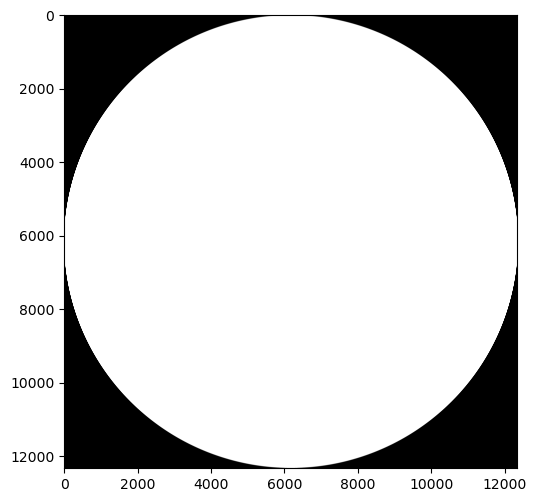

In [3]:
#create a circle, the higher resolution, the better we can approximate Pi
circle = circle_creator_function(6*1028,1,0,6*2056,6*2056)
# tell matplotlib to display our images as a 6 x 6 inch image, with resolution of 100 dpi
plt.figure(figsize = (6,6), dpi=100) 
# tell matplotlib to display our image, using a gray-scale lookup table.
plt.imshow(circle, cmap=plt.cm.gray) 

In [4]:
#define Monte Carlo simulation function with N random samples
def mc_pi_calculator(N, square_grid, sample_grid_setting = False):
    circle_samples = 0
    #option to create view of the scattered samples
    if sample_grid_setting == True:
        sample_grid = square_grid.copy()
        
    for N in range(0,N):
        sample = np.random.randint(np.shape(circle)[0], size=(1, 2))[0]
        if square_grid[sample[0]][sample[1]] == 1:
            circle_samples += 1
        
        if sample_grid_setting == True:
            sample_grid[sample[0]][sample[1]] = 3
            
    if sample_grid_setting == True:
        plt.figure(figsize = (6,6), dpi=100) 
        cmap_list = ListedColormap(["black", "white", "red"])
        plt.imshow(sample_grid, cmap = cmap_list)
    pi = 4*circle_samples/N
    return pi

3.1405671405671405

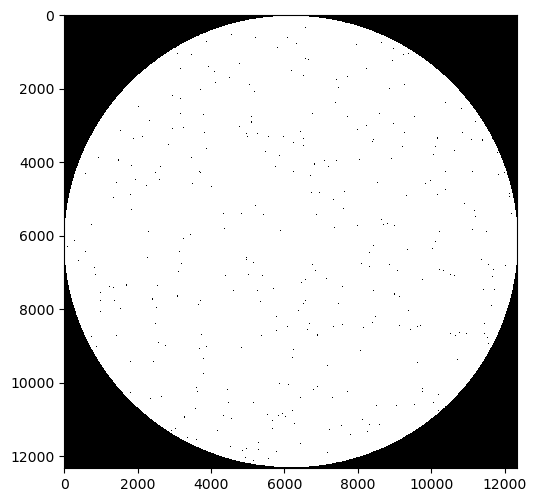

In [5]:
#run the Monte Carlo simulation, in this case for N = 10^6 samples
mc_pi_calculator(int(1e6), circle, sample_grid_setting = True)

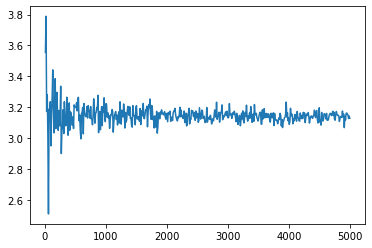

In [6]:
#we can also plot how precise the predicted value is and how quickly it converges by repeating the Monte Carlo simulation for varying sample sizes
n_list = np.arange(10,5*1e3,10, dtype = "int16")
pi_values = []
for n in range(10,int(5*1e3),10):
    pi_values.append(mc_pi_calculator(n, circle))
plt.plot(n_list,np.array(pi_values))

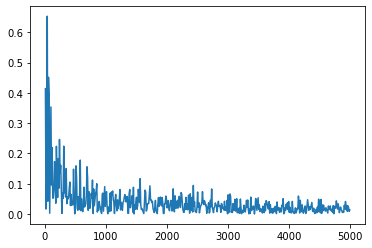

In [7]:
#for the difference between the actual value of Pi and the computed value from the MC simulation we get
n_list = np.arange(10,5*1e3,10, dtype = "int16")
pi_values = []
for n in range(10,int(5*1e3),10):
    pi_values.append(mc_pi_calculator(n, circle))
plt.plot(n_list,np.abs(np.pi-np.array(pi_values)))
#plt.yscale("log")

In [8]:
#the average value of Pi from MC simulations with more than 1000 iterations is then
np.average(np.array(pi_values)[100:])

3.1450388169416104

<h2> Olbers’s Paradox - 2D Sherwood Forest </h2>

We estimate the average distance a photon can propagate freely through space before hitting a star, which inversely would be the average distance between an observer randomly looking into the night sky and a star that falls directly into their line of sight. We start by looking at the example of a Sherwood Forest in which each tree has a radius of $r = 10m$ and the density of trees is $\rho _{trees} = 0.005 \frac{1}{m^2}$. Inside a box of $A_{box} = 1000 m^2$ this would mean there is a number of $N_{trees} = 5$ distributed randomly across the sample. We calculate the resulting probability of hitting a tree by sampling a number $N_{Total}$ of infinitesimally small arrows that move in a straight line without friction until they hit a tree. For our Monte Carlo Simulation we then sample the amount of arrows hitting a tree $N_{hits}$ such that the mean probability of a hit becomes <br>
$P_{tree} = \frac{N_{hits}}{N_{Total}}$ <br>
From geometrical analysis, we also find that the theoretical probability of hitting a circle of radius $r$ at a distance $d$ is given by <br>
$P_{tree} = \frac{2 \theta}{2 \pi} = \frac{arctan(\frac{r}{d})}{\pi}$ <br>
which may then be reformulated to yield the average distance <br>
$d = \frac{r}{tan(\pi P_{tree})}$

/home/santi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in true_divide


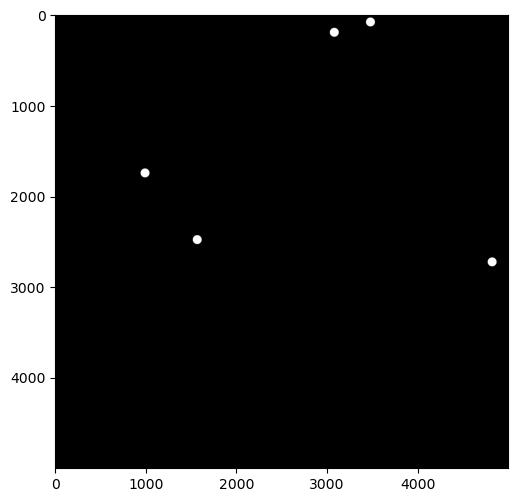

In [9]:
#first we create a NxN grid of A = 1000m2 and fill it with 5 spheres of radius r = 10m at random points in the grid
scaling = 5
box = np.zeros((1000*scaling,1000*scaling))
for i in range(5):
    random_centre = np.random.randint(low = 10*scaling, high = np.shape(box)[0]-10*scaling, size=(1, 2))[0]
    xmin, xmax = random_centre[0]+np.array([-10*scaling,10*scaling])
    ymin, ymax = random_centre[1]+np.array([-10*scaling,10*scaling])
    box[xmin:xmax,ymin:ymax] = circle_creator_function(10*scaling,1,0,20*scaling,20*scaling) 
#finally, we check our result by plotting the box
plt.figure(figsize = (6,6), dpi=100) 
# tell matplotlib to display our image, using a gray-scale lookup table.
plt.imshow(box, cmap=plt.cm.gray) 

In [10]:
def random_line_generator(random_angle, box, scaling):
    centre = np.array(np.shape(box))/2
    if random_angle < 1/4*np.pi:
        edge = (centre+500*scaling*np.array([1,np.tan(random_angle)])).astype("int16")
    elif random_angle >= 1/4*np.pi and random_angle < 1/2*np.pi:
        random_angle += (-1/4*np.pi)
        edge = (centre+500*scaling*np.array([np.tan(random_angle),1])).astype("int16")
    elif random_angle >= 1/2*np.pi and random_angle < 3/4*np.pi:
        random_angle += (-1/2*np.pi)
        edge = (centre+500*scaling*np.array([-np.tan(random_angle),1])).astype("int16")
    elif random_angle >= 3/4*np.pi and random_angle <= np.pi:
        random_angle += (-3/4*np.pi)
        edge = (centre+500*scaling*np.array([-1,np.tan(random_angle)])).astype("int16")
    elif random_angle >= np.pi and random_angle <= 5/4*np.pi:
        random_angle += (-np.pi)
        edge = (centre+500*scaling*np.array([-1,-np.tan(random_angle)])).astype("int16")
    elif random_angle >= 5/4*np.pi and random_angle < 3/2*np.pi:
        random_angle += (-5/4*np.pi)
        edge = (centre+500*scaling*np.array([-np.tan(random_angle),-1])).astype("int16")
    elif random_angle >= 3/2*np.pi and random_angle < 7/4*np.pi:
        random_angle += (-3/2*np.pi)
        edge = (centre+500*scaling*np.array([np.tan(random_angle),-1])).astype("int16")
    elif random_angle >= 7/4*np.pi and random_angle <= 2*np.pi:
        random_angle += (-7/4*np.pi)
        edge = (centre+500*scaling*np.array([1,-np.tan(random_angle)])).astype("int16")
    else:
        print("Error: Angle outside of bounds")
        return 0
    line = draw.line_nd(centre, edge, endpoint=False)
    return line

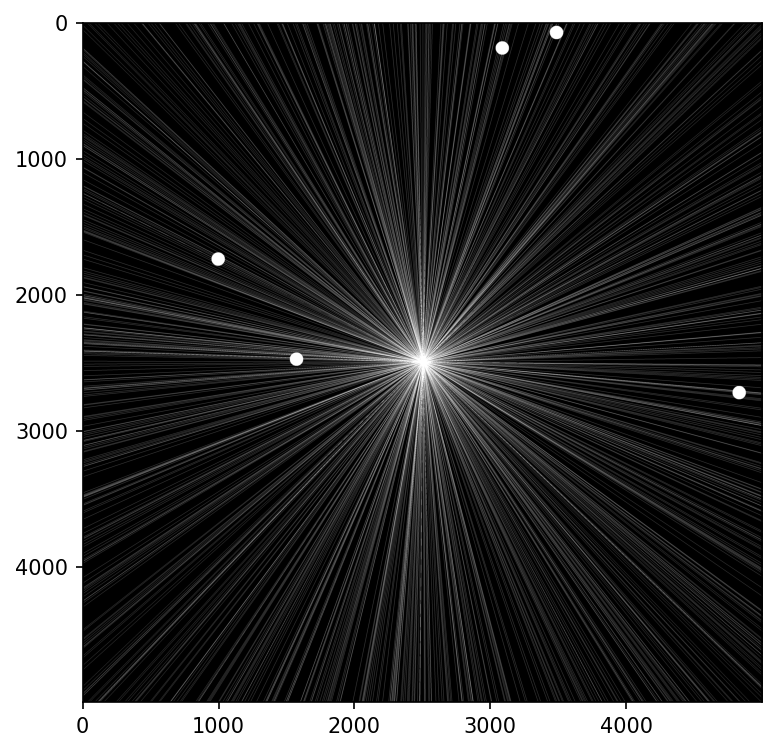

In [11]:
#then we draw a line in a random direction for each sample
from skimage import draw
for i in range(1000):
    random_angle = np.random.uniform(low = 0, high = 2*np.pi)
    centre = np.array(np.shape(box))/2
    line = random_line_generator(random_angle, box, scaling)
    box[line] = 1
#finally, we check our result by plotting the box
plt.figure(figsize = (6,6), dpi=150) 
# tell matplotlib to display our image, using a gray-scale lookup table.
plt.imshow(box, cmap=plt.cm.gray) 

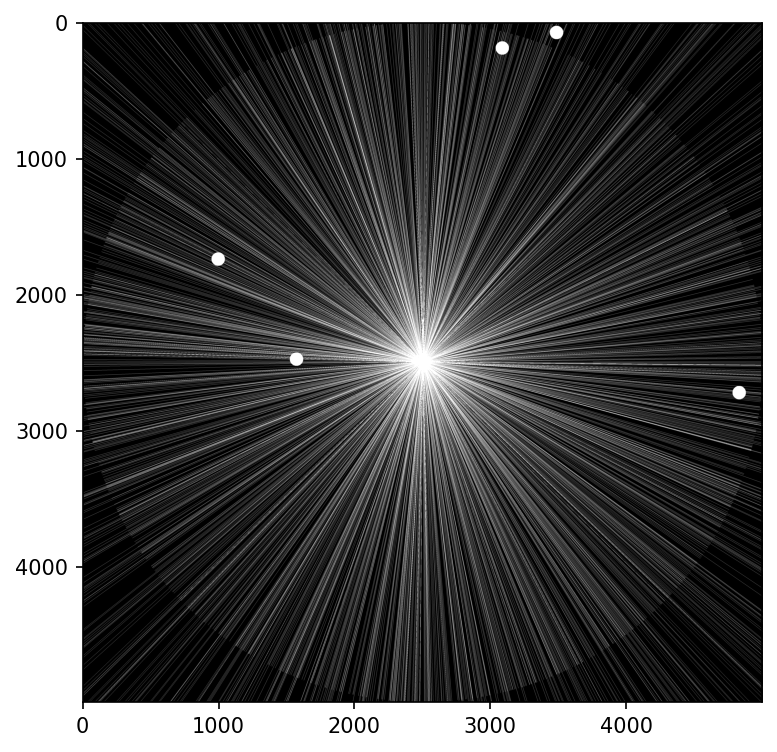

In [12]:
#legacy code for a simpler, spherical version of the line generation algorithm
from skimage import draw
for i in range(1000):
    random_angle = np.random.uniform(low = 0, high = 2*np.pi)
    centre = np.array(np.shape(box))/2
    line = draw.line_nd(centre, (centre+500*scaling*np.array([np.cos(random_angle),np.sin(random_angle)])).astype("int16"), endpoint=False)
    box[line] = 1
#finally, we check our result by plotting the box
plt.figure(figsize = (6,6), dpi=150) 
# tell matplotlib to display our image, using a gray-scale lookup table.
plt.imshow(box, cmap=plt.cm.gray) 

In [13]:
#now we write a function that creates a grid with circle masks
def sherwood_forest_generator(radius = 10, grid_size = 1000, N_trees = 5, scaling = 5):
    box = np.zeros((grid_size*scaling,grid_size*scaling))
    for i in range(N_trees):
        random_centre = np.random.randint(low = radius*scaling, high = np.shape(box)[0]-radius*scaling, size=(1, 2))[0]
        xmin, xmax = random_centre[0]+np.array([-radius*scaling,radius*scaling])
        ymin, ymax = random_centre[1]+np.array([-radius*scaling,radius*scaling])
        box[xmin:xmax,ymin:ymax] = circle_creator_function(radius*scaling,1,0,radius*2*scaling,radius*2*scaling) 
    forest_mask = (box == 1)
    return box, forest_mask

#and subsequently, a function that runs the actual MC simulation by generating a random grid of circles and shooting off random lines from the centre to check wether or not there was a succesful hit
def mc_sherwood_forest(N_Total, radius = 10, grid_size = 1000, N_trees = 5, scaling = 5):
    N_hits = 0
    for i in range(int(N_Total)):
        box, forest_mask = sherwood_forest_generator(radius = radius, grid_size = grid_size, N_trees = N_trees, scaling = scaling)
        random_angle = np.random.uniform(low = 0, high = 2*np.pi)
        centre = np.array(np.shape(box))/2
        line = random_line_generator(random_angle, box, scaling)
        box[line] = 2
        line_forest_mask = (box == 2 ) & (forest_mask == True)
        if line_forest_mask.any() == True:
            N_hits += 1
    P_hit = N_hits/N_Total
    d_average = radius/np.tan(np.pi*P_hit)
    return d_average            

In [14]:
#we may now run the Mote Carlo simulation for N = 1000 iterations to get an initial value 
mc_sherwood_forest(int(1e3))

/home/santi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in true_divide


58.379700587525726

/home/santi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in true_divide
/home/santi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: divide by zero encountered in double_scalars


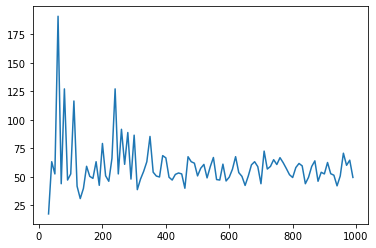

In [15]:
#and once again, test if the results converge towards a common value for the average distance the arrow may travel
n_list = np.arange(10,1e3,10, dtype = "int16")
d_average = []
for n in range(10,int(1e3),10):
    d_average.append(mc_sherwood_forest(n))
plt.plot(n_list,np.array(d_average))

In [16]:
#the average distance you can travel before hitting a tree in such a sherwood forest is then
print(np.average(d_average[20:]), "km")

57.932208363414766 km
